### Sobre os dados

Este conjunto de dados é sobre a evasão de clientes de uma empresa de telefonia. Abaixo temos o dicionário de dados.

**state** - Código de 2 letras do estado americado de residencia do cliente

**account length** - numero de meses que o cliente está com o provedor de telecomunicações

area code - codigo de área

**international plan** - Se cliente possui plano internacional sim ou não

**voice mail plan** - Se o cliente tem plano de correio de voz sim ou não

**number vmail messages** - Numero de mensagem de correio de voz

total day minutes - total de minutos das chamadas diarias

total day calls - numeros total de chamadas diarias

total day charge - cobrança total das chamadas por dia

total eve minutes - total de minutos de chamadas noturnas

total eve calls - total de chamadas noturnas

total eve charge - cobrança total das chamadas noturna

total night minutes - total de minutos de chamadas noturnas

total night calls - Numero total de chamadas noturnas

total night charge - cobrança total das chamadas noturnas

total intl minutes - total de minutos para chamadas 
internacionais

total intl calls - total de chamadas internacionais

total intl charge - cobrança total de chamadas internacionais

number customer service calls - numero de ligações para atendimento ao cliente

Churn - Evasão de clientes, sim ou não


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('data\churn_train.csv')
df.shape

(4250, 20)

#### Análise Exploratória

In [3]:
df.shape

(4250, 20)

<AxesSubplot:ylabel='churn'>

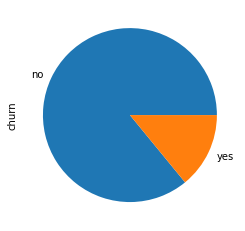

In [4]:
df.churn.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='international_plan'>

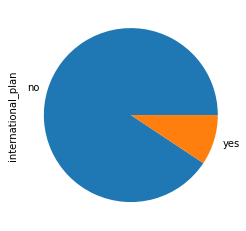

In [5]:
df.international_plan.value_counts().plot(kind='pie')

In [6]:
churn_y = df.loc[df.churn == 'yes', 'churn'].count()
churn_n = df.loc[df.churn == 'no', 'churn'].count()
churn_total = churn_y+churn_n
print('Quantidade total de clientes ' +str(churn_total))
print('Quantidade de clientes com churn ' +str(churn_y) + ' que representa ' + str(round(100*churn_y/churn_total,0)) + '% da base de clientes')
print('Quantidade de clientes sem churn ' +str(churn_n) + ' que representa ' + str(round(100*churn_n/churn_total,0)) + '% da base de clientes')

Quantidade total de clientes 4250
Quantidade de clientes com churn 598 que representa 14.0% da base de clientes
Quantidade de clientes sem churn 3652 que representa 86.0% da base de clientes


In [7]:
# !pip freeze > requirements.txt

In [8]:
df.isnull().sum() 

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

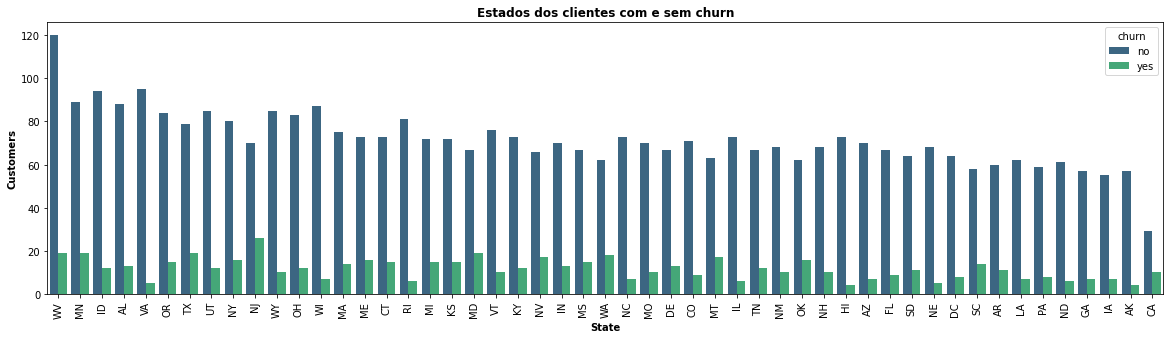

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(data = df, x='state', order=df['state'].value_counts().index, palette='viridis', hue='churn')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=10, fontweight='bold')
plt.ylabel('Customers', fontsize=10, fontweight='bold')
plt.title('Estados dos clientes com e sem churn', fontsize=12, fontweight='bold')
plt.show()

<AxesSubplot:>

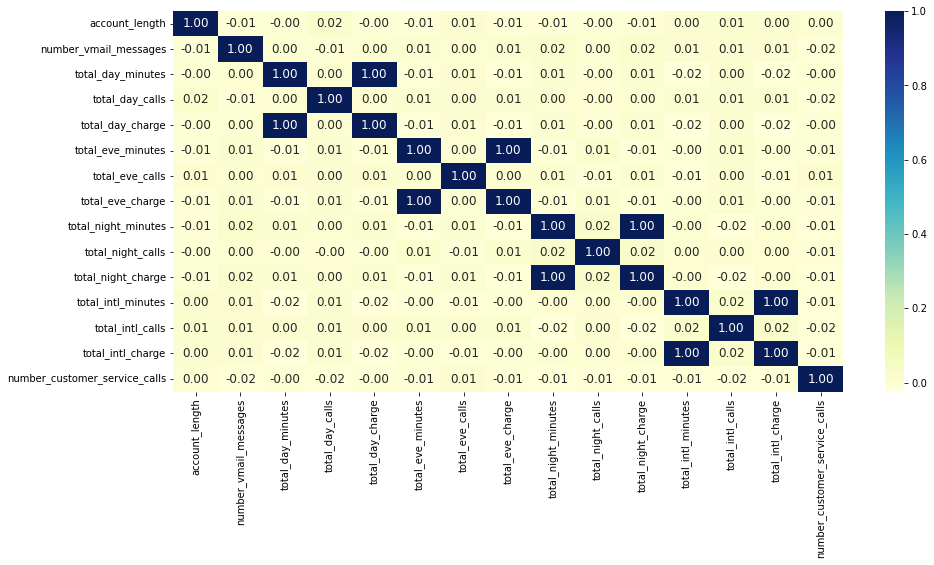

In [10]:
# Correlação entre as variáveis 
corr = df.corr()
fig2, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, cmap='YlGnBu', annot_kws={'size': 12}, fmt='.2f')

#### Feature Engineering

In [11]:
df['churn'] = df['churn'].astype('category')
df['churn'] = df['churn'].cat.codes

In [12]:
df['voice_mail_plan'] = df['voice_mail_plan'].astype('category')
df['voice_mail_plan'] = df['voice_mail_plan'].cat.codes

In [13]:
df['international_plan'] = df['international_plan'].astype('category')
df['international_plan'] = df['international_plan'].cat.codes

In [14]:
df = pd.get_dummies(df, columns=['area_code'])

In [15]:
df['state'] = df['state'].astype('category')
df['state'] = df['state'].cat.codes

#### Treinamento do modelo

In [16]:
#pip install xgboost

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import seaborn as sns 
import warnings 

In [18]:
# Separando variáveis independentes e dependente
X = df.drop('churn', axis=1)
y = df['churn']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=987)

In [20]:
xgb_model = XGBClassifier(max_depth=10, 
                          learning_rate=0.1,
                          n_estimators=300, 
                          silent=True,
                          objective='binary:logistic',
                          nthread=-1,
                          missing=np.nan,
                          subsample=0.9, 
                          colsample_bytree=0.9, 
                          base_score=0.5, 
                          seed=142)

In [21]:
xgb_model.fit(X_train, y_train)

[20:56:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
              random_state=142, reg_alpha=0, ...)

In [22]:
prob = xgb_model.predict_proba(X_test)[:,1]
pred = xgb_model.predict(X_test)

In [23]:
# Salvando modelo treinado usando pickle
import joblib 

joblib.dump(xgb_model, r'data\xgb_model_churn.pkl')

['data\\xgb_model_churn.pkl']

In [24]:
print('AUC: '+str(metrics.roc_auc_score(y_test, prob)))
print('Accuracy : '+str(metrics.accuracy_score(y_test, pred)))
print('Recall : '+str(metrics.recall_score(y_test, pred)))
print('F1-Measure : '+str(metrics.f1_score(y_test, pred)))

AUC: 0.9196783288478789
Accuracy : 0.9552941176470588
Recall : 0.7401960784313726
F1-Measure : 0.8412256267409471


<AxesSubplot:>

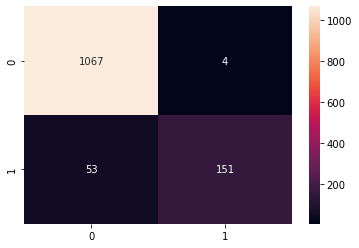

In [25]:
cm = confusion_matrix(y_test, xgb_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')

<AxesSubplot:>

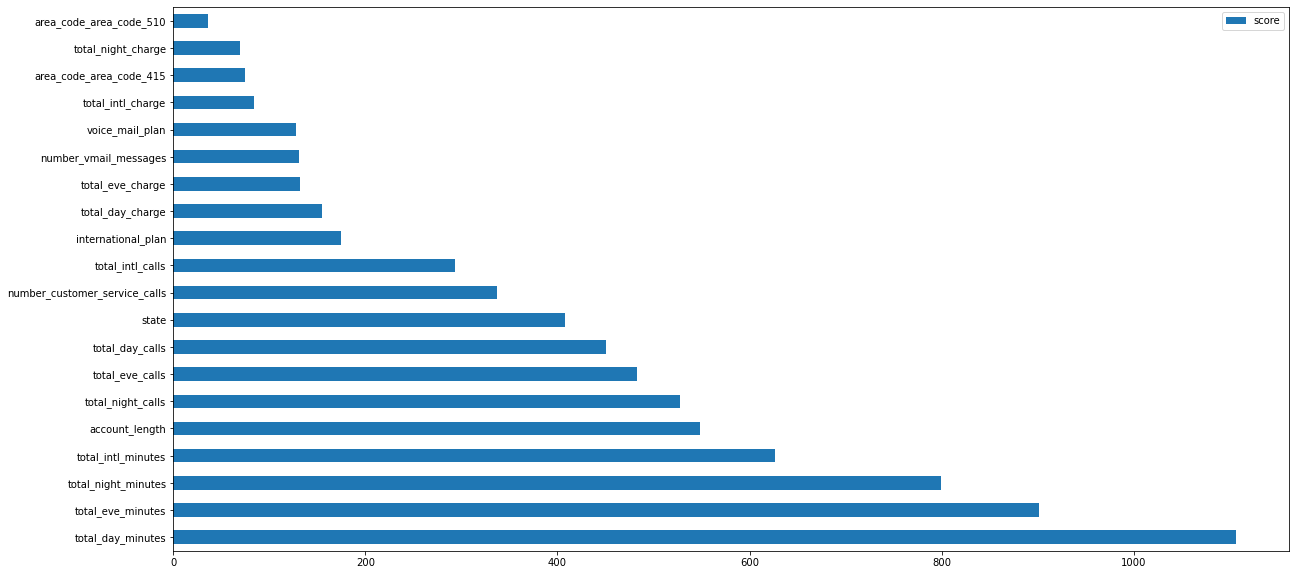

In [26]:
# Feature Importance 
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=['score']).sort_values(by = 'score', ascending=True)
data.nlargest(20, columns='score').plot(kind='barh', figsize = (20,10))

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [28]:
select_feature = SelectKBest(chi2, k=5).fit(X_test, y_test)
a = select_feature.scores_
b = X_train.columns
df2 = pd.DataFrame(list(zip(b, a)), columns=['Column', 'Score'])

df2['Score'] = df2['Score'].replace(np.nan, 0)
df2['Score'] = df2['Score'].astype(int)
df2.sort_values(by='Score', ascending=False)

,Column,Score
5,total_day_minutes,1519
4,number_vmail_messages,367
7,total_day_charge,258
17,number_customer_service_calls,83
8,total_eve_minutes,55
2,international_plan,44
0,state,31
11,total_night_minutes,19
6,total_day_calls,13
3,voice_mail_plan,12


##### Interpretabilidade do modelo

Interpretabilidade do Modelo Usando Shap Values

https://shap.readthedocs.io/en/latest/index.html

In [29]:
#!pip install shap

In [30]:
import shap

In [31]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


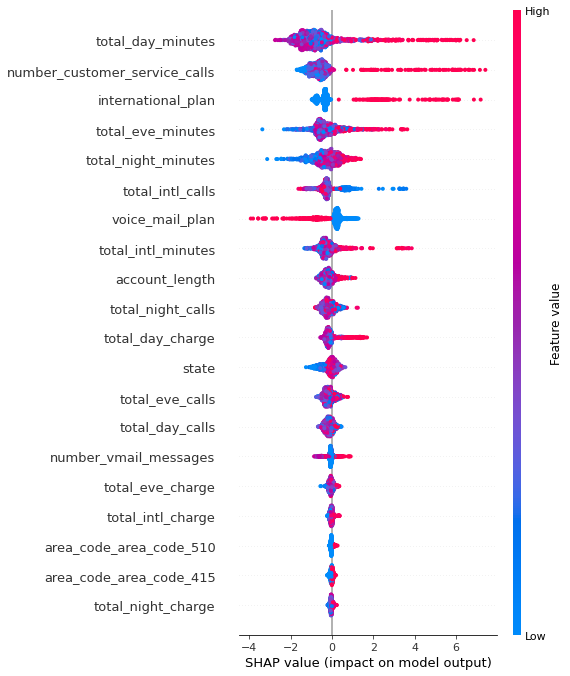

In [32]:
shap.summary_plot(shap_values)

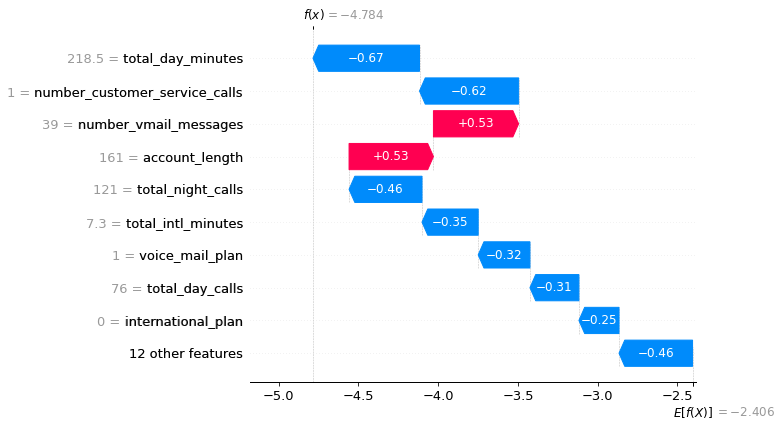

In [33]:
shap.plots.waterfall(shap_values[0])

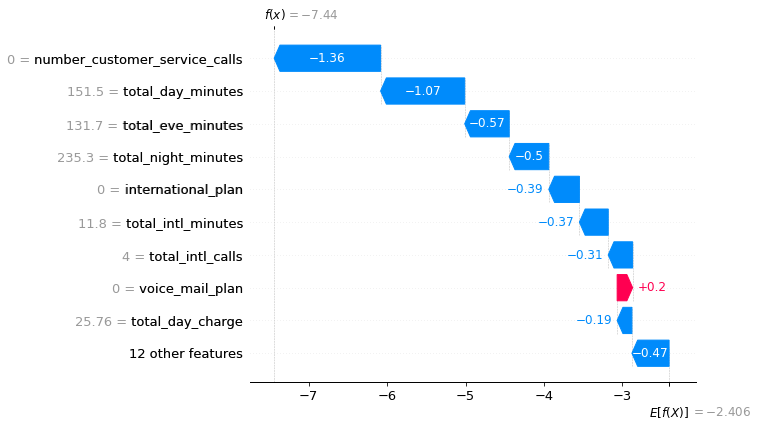

In [34]:
shap.plots.waterfall(shap_values[3])

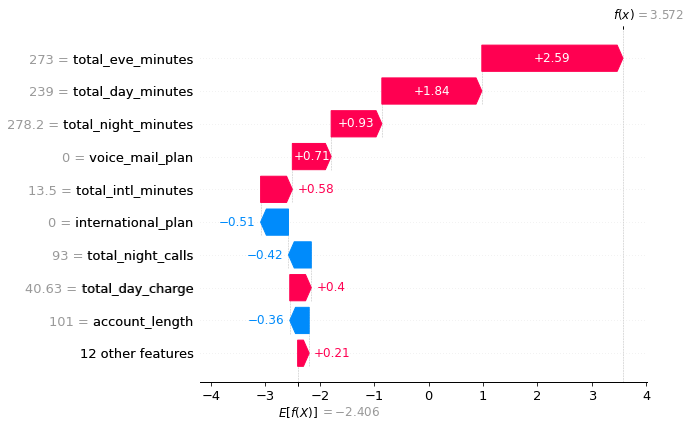

In [35]:
shap.plots.waterfall(shap_values[6])

In [36]:
shap.initjs()
shap.plots.force(shap_values[0])

In [37]:
shap.initjs()
shap.plots.force(shap_values[3])

In [38]:
shap.initjs()
shap.plots.force(shap_values)

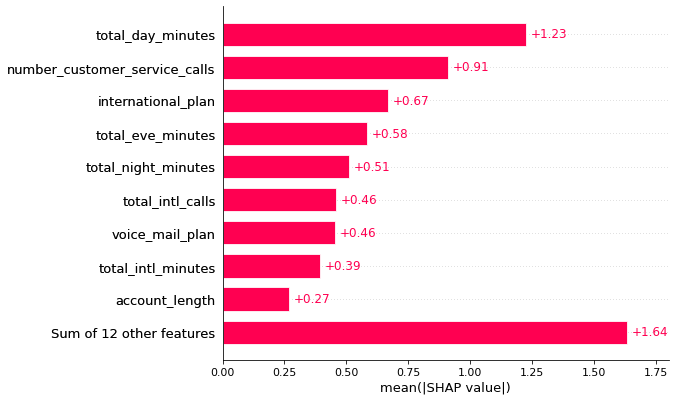

In [39]:
shap.plots.bar(shap_values)

Explainer expected value: [-2.40551957]


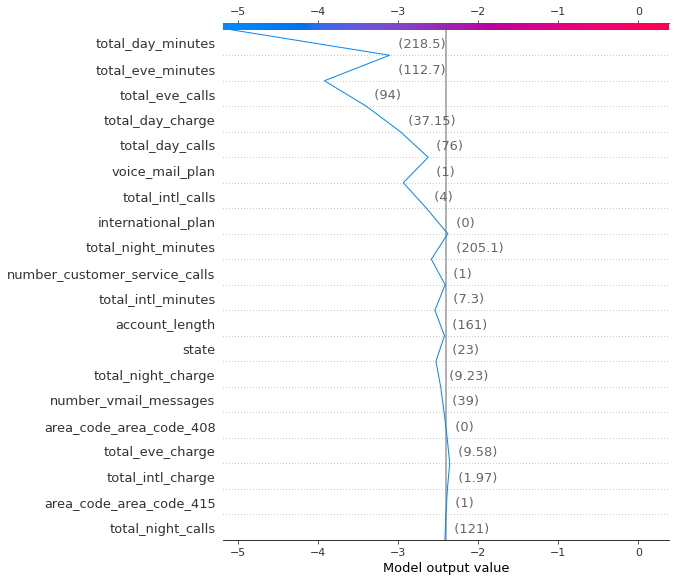

In [40]:
explainer = shap.TreeExplainer(xgb_model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(20)
features = X_test.iloc[select]
features_display = X_test.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]
    
shap.decision_plot(expected_value, shap_values, features_display)

#### Dicas Sobre nossa Entrega do Desafio

1. Melhore as features 
2. Faça Tuning de parametros
3. Exclua ou adicione variáveis 
4. Se achar melhor mude o algoritmo treinado

#### Métrica a ser melhorada 

recall hoje esta em 74% precisamos dele em 92%